<a href="https://colab.research.google.com/github/Rahulaggl/EDA/blob/main/LAD_DA_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Time Series Analysis**

In [ ]:
# 1. Load Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

# Set plot style
sns.set(style="whitegrid")

In [ ]:
# 2. Load the Data
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/opsd_germany_daily.csv"
df = pd.read_csv(url, parse_dates=['Date'], index_col='Date')

**Data Preprocessing**

In [ ]:
# 3. Data Preprocessing
# Check for missing values
print(df.isnull().sum())
# Fill missing values (if any)
df.fillna(method='ffill', inplace=True)  # Forward fill for time series

Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
dtype: int64


<ipython-input-4-b79497db59f0>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill for time series


**Visualize the Time Series**

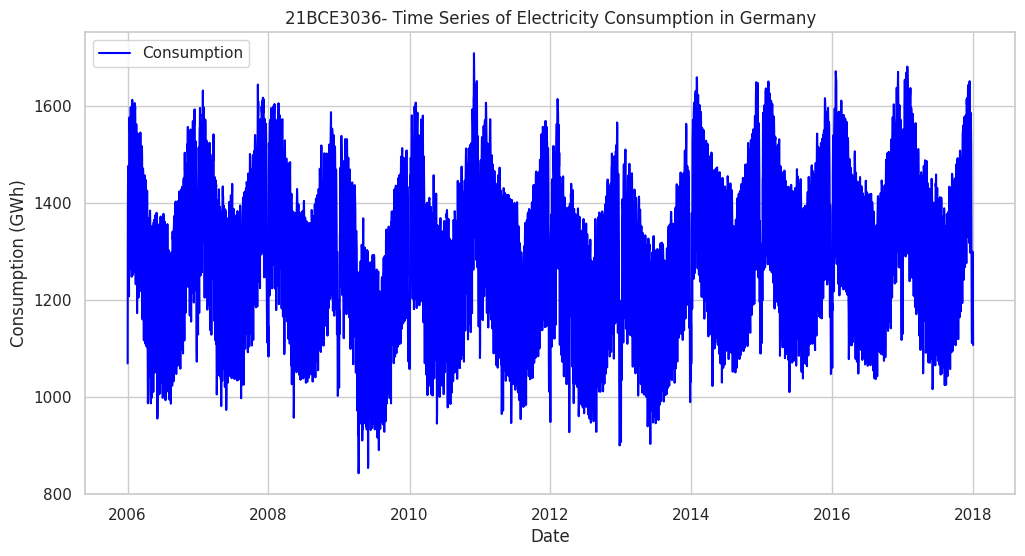

In [ ]:
# 4. Visualize the Time Series
plt.figure(figsize=(12, 6))
plt.plot(df['Consumption'], label='Consumption', color='blue')
plt.title('21BCE3036- Time Series of Electricity Consumption in Germany')
plt.xlabel('Date')
plt.ylabel('Consumption (GWh)')
plt.legend()
plt.show()

**Check for Stationarity**

In [ ]:
# 5. Check for Stationarity
result = adfuller(df['Consumption'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -6.239148288864478
p-value: 4.7440549018425884e-08


**Seasonal Decomposition**

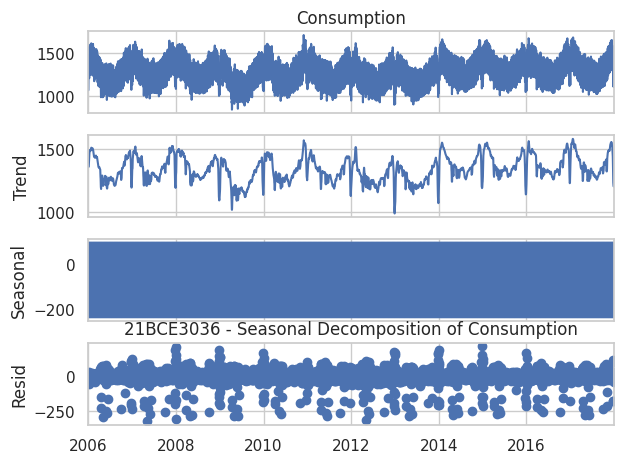

In [ ]:
# 6. Seasonal Decomposition
decomposition = sm.tsa.seasonal_decompose(df['Consumption'], model='additive')
decomposition.plot()
plt.title('21BCE3036 - Seasonal Decomposition of Consumption')
plt.show()

**Autocorrelation and Partial Autocorrelation Plots**

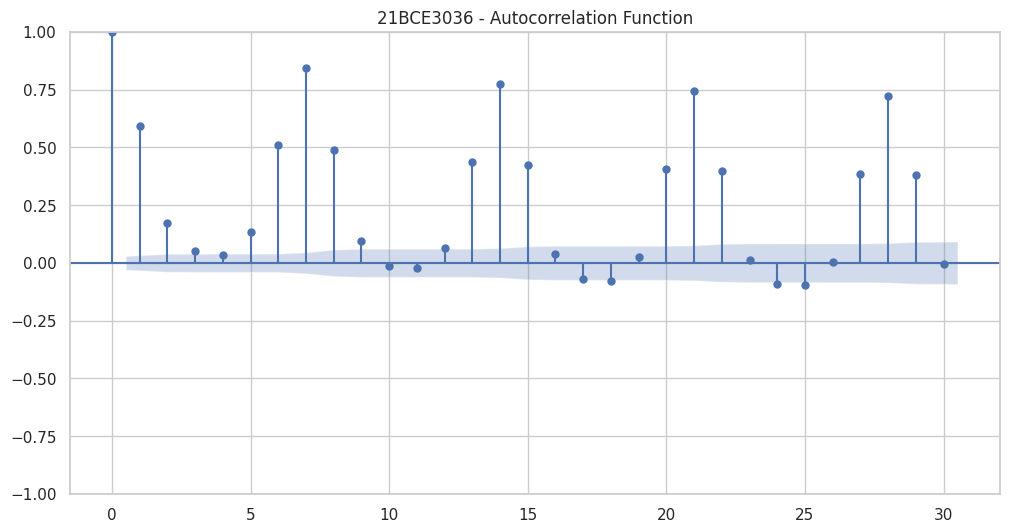

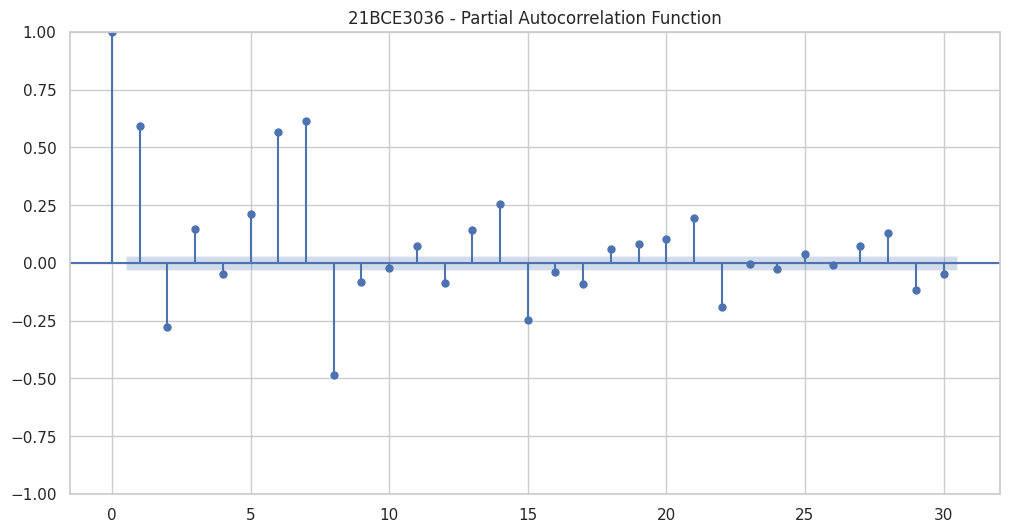

In [ ]:
# 7. Autocorrelation and Partial Autocorrelation Plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))
plot_acf(df['Consumption'], lags=30, ax=plt.gca())
plt.title('21BCE3036 - Autocorrelation Function')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(df['Consumption'], lags=30, ax=plt.gca())
plt.title('21BCE3036 - Partial Autocorrelation Function')
plt.show()

**Forecasting with ARIMA**

In [ ]:
# 8. Forecasting with ARIMA
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['Consumption'], order=(5, 1, 0))  # Adjust the order as needed
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            Consumption   No. Observations:                 4383
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -26538.082
Date:                Mon, 23 Sep 2024   AIC                          53088.164
Time:                        19:27:42   BIC                          53126.476
Sample:                    01-01-2006   HQIC                         53101.682
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2658      0.012    -22.037      0.000      -0.289      -0.242
ar.L2         -0.5718      0.011    -53.064      0.000      -0.593      -0.551
ar.L3         -0.4309      0.015    -27.874      0.0

**Plot the Forecast**

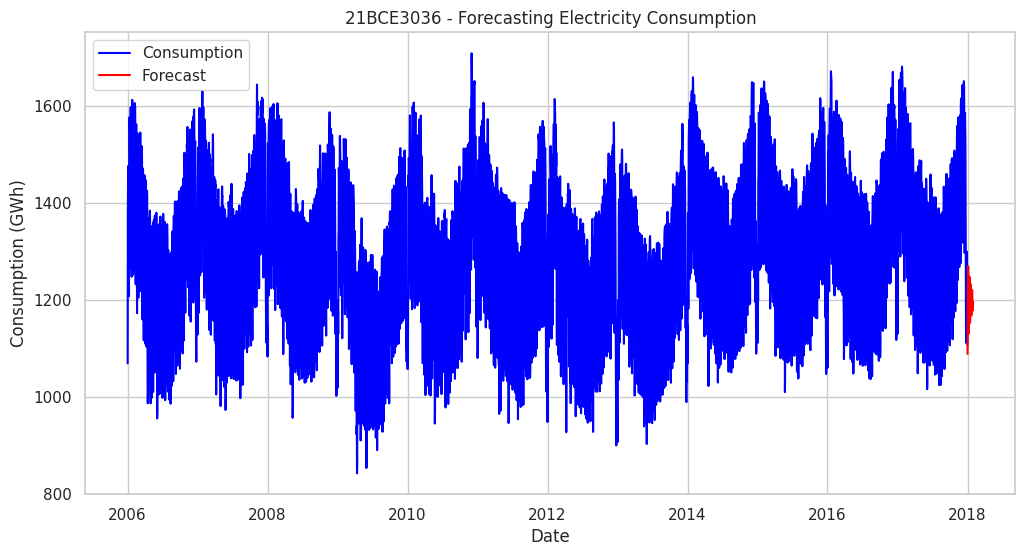

In [ ]:
# 9. Plot the Forecast
forecast = model_fit.forecast(steps=30)  # Forecasting the next 30 days
plt.figure(figsize=(12, 6))
plt.plot(df['Consumption'], label='Consumption', color='blue')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.title('21BCE3036 - Forecasting Electricity Consumption')
plt.xlabel('Date')
plt.ylabel('Consumption (GWh)')
plt.legend()
plt.show()